In [3]:
import mne
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import os.path as op
from utils import add_trigger

## Loading in data

In [7]:
# Loading data
raw = mne.io.read_raw_brainvision('own_group9.vhdr', eog=('VEOG', 'HEOG'))

raw.load_data()

Extracting parameters from own_group9.vhdr...
Setting channel info structure...
Reading 0 ... 684819  =      0.000 ...   684.819 secs...


<RawBrainVision | own_group9.eeg, 32 x 684820 (684.8 s), ~167.2 MB, data loaded>

In [221]:
# Specify the channel locations
montage = mne.channels.make_standard_montage('standard_1020')
raw.set_montage(montage, verbose=False)

<RawBrainVision | own_group9.eeg, 32 x 684820 (684.8 s), ~167.2 MB, data loaded>

In [222]:
# Redefine the reference to a common average
raw.set_eeg_reference('average', projection=False, verbose=False)

<RawBrainVision | own_group9.eeg, 32 x 684820 (684.8 s), ~167.2 MB, data loaded>

## Plotting raw data

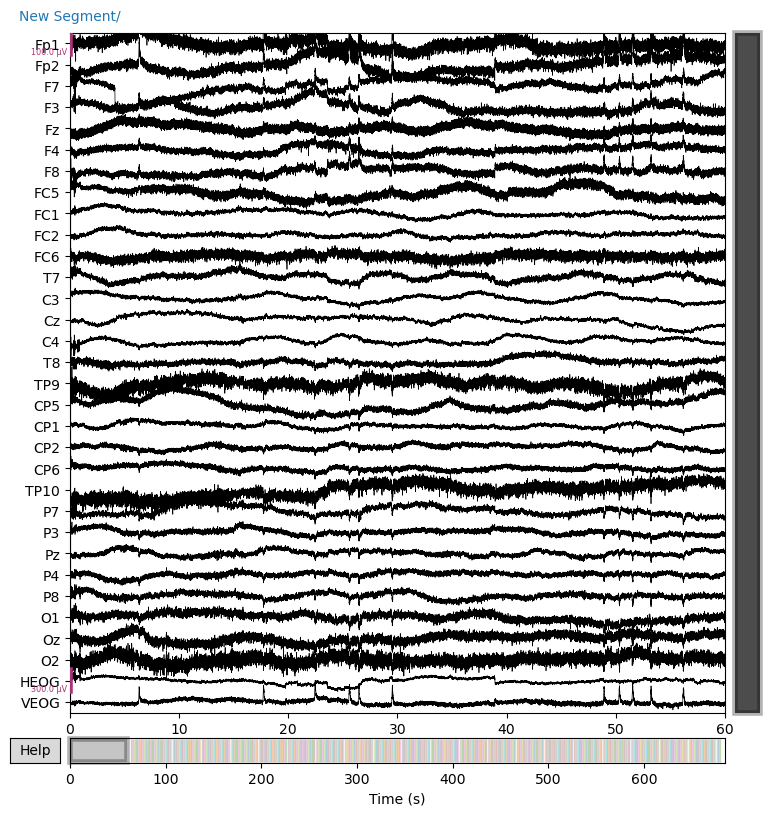

In [223]:
# Plot your raw data
raw.plot(n_channels = 32, scalings = dict(eeg=50e-6), duration = 60);

## High pass filtering before ica preprocessing

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Filter length: 33001 samples (33.001 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 3301 samples (3.301 sec)



[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.6s finished


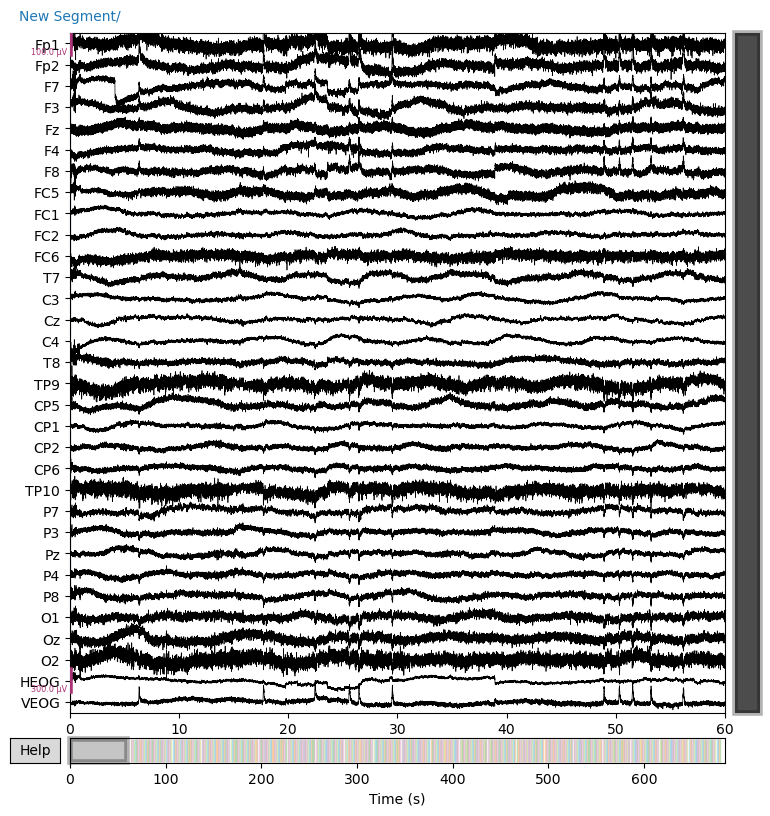

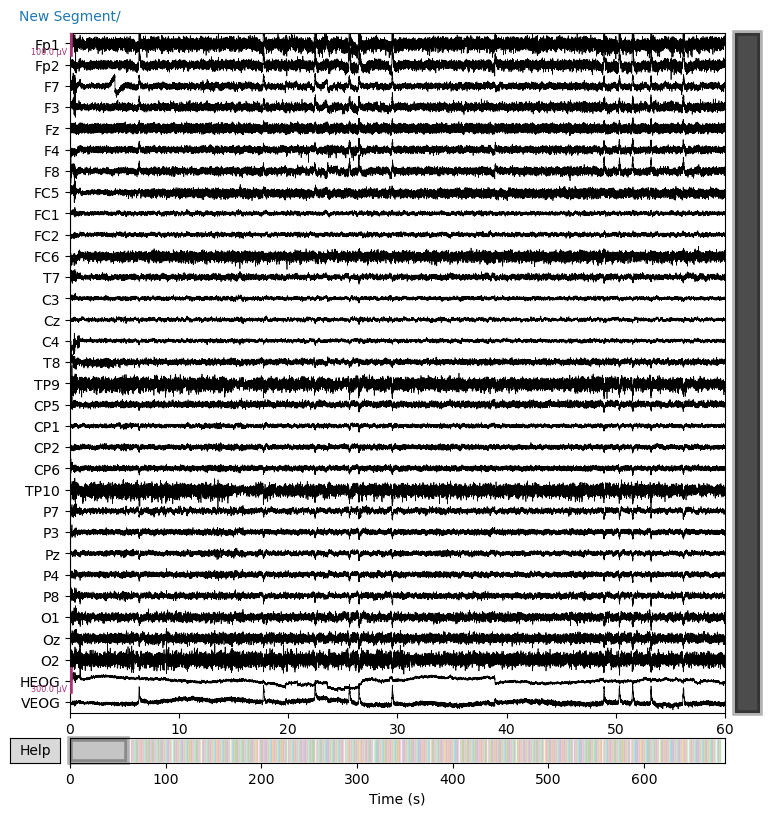

In [224]:
# Filtering data

raw = raw.filter(0.1,None)
raw_ica = raw.copy().filter(1, None) #Used for ica preprocessing

raw.plot(n_channels = 32, scalings = dict(eeg=50e-6), duration = 60);
raw_ica.plot(n_channels = 32, scalings = dict(eeg=50e-6), duration = 60);

### Ica Preprocessing

In [225]:
%pip install -U scikit-learn #installing package for ica preprocessing
import sklearn

Note: you may need to restart the kernel to use updated packages.


**Set up and fit ICA with mne.preprocessing.ICA() with 800 iterations with a random seed at 7 (for reproducibility) and n_components=0.95**

n_components=0.95 ensures that the number of components selected explain at least 95% of the variance in the data

In [226]:
# Ica preprocessing
ica = mne.preprocessing.ICA(n_components=0.95, random_state=7, max_iter=800)
ica.fit(raw_ica)

Fitting ICA to data using 30 channels (please be patient, this may take a while)
Selecting by explained variance: 15 components
Fitting ICA took 5.7s.


<ICA | raw data decomposition, method: fastica (fit in 15 iterations on 684820 samples), 15 ICA components (30 PCA components available), channel types: eeg, no sources marked for exclusion>

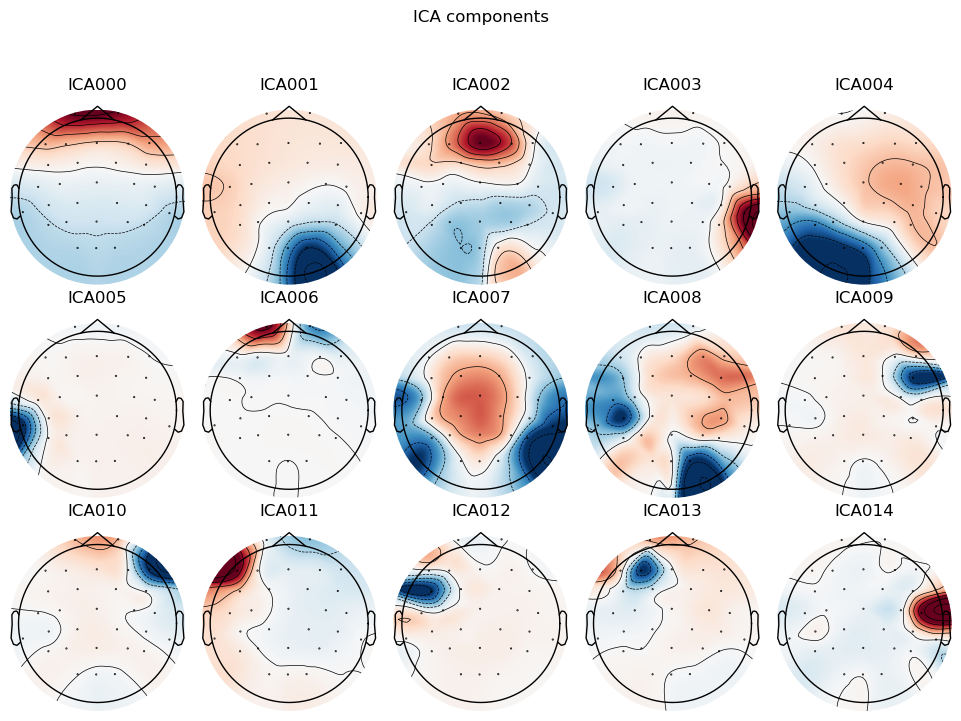

In [227]:
ica.plot_components(); #plotting ica components

Creating RawArray with float64 data, n_channels=17, n_times=684820
    Range : 0 ... 684819 =      0.000 ...   684.819 secs
Ready.


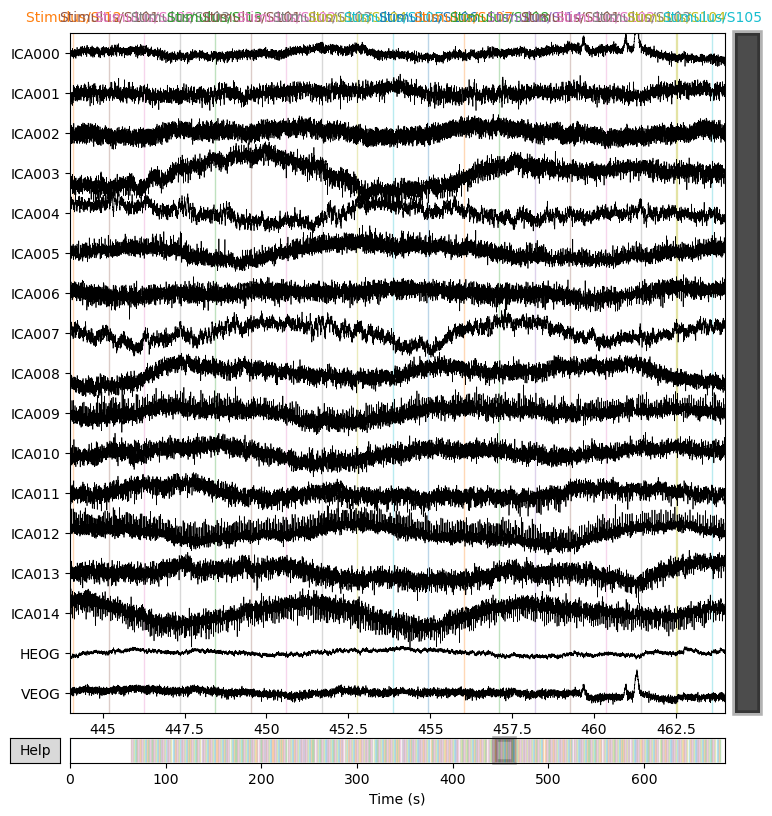

In [228]:
ica.plot_sources(raw, start=444); #plotting time courses

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
342 matching events found
No baseline correction applied
0 projection items activated


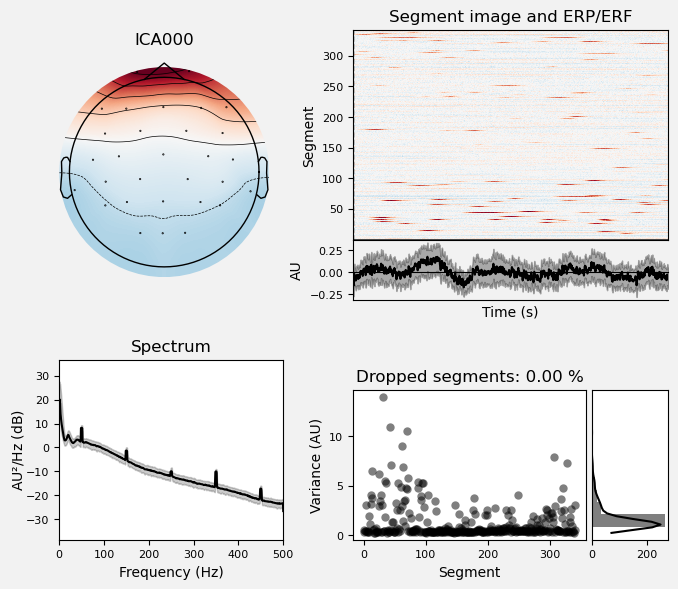

Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 1 ICA component
    Projecting back using 30 PCA components


<RawBrainVision | own_group9.eeg, 32 x 684820 (684.8 s), ~167.2 MB, data loaded>

In [229]:
# Identifying the noisy components

#component 0 is execluded as it is saccades (similar to VEOG), no other components is excluded 

ica.exclude=[0]
ica.plot_properties(raw, picks=ica.exclude);

ica.apply(raw)

## Low pass filtering

Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 331 samples (0.331 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.4s finished


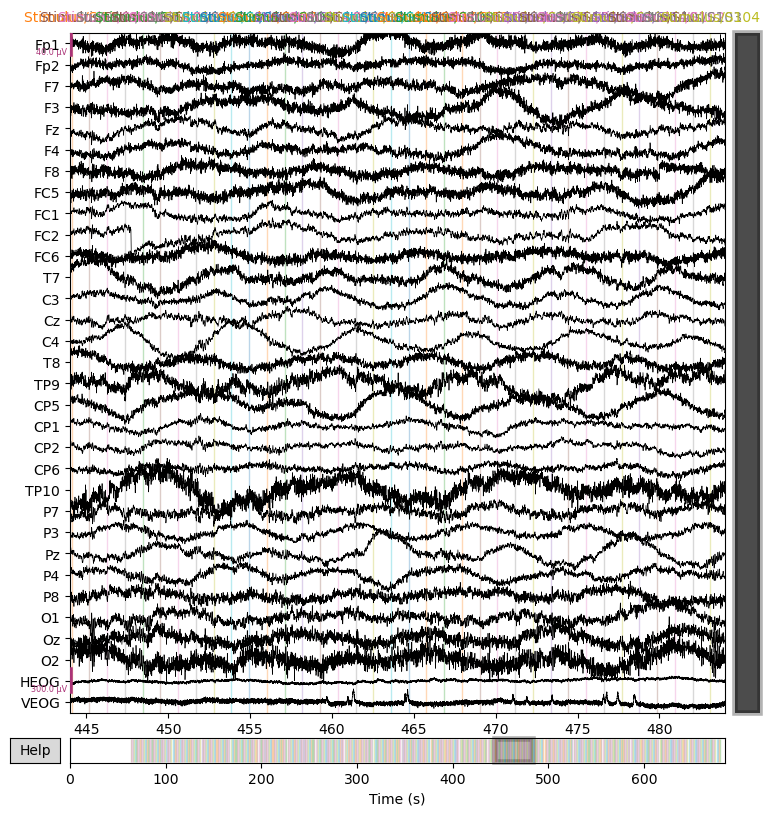

In [230]:
#applying low pass filter
raw=raw.filter(None, 40)
raw.plot(n_channels=32, duration=40, start=444);

## Extracting events from data (everytime a trigger was sent in the script)

In [231]:
# Epoch your data
events, _ = mne.events_from_annotations(raw)

events

np.unique(events[:,2])

Used Annotations descriptions: ['New Segment/', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S 14', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106', 'Stimulus/S107', 'Stimulus/S108']


array([   12,    13,    14,   101,   102,   103,   104,   105,   106,
         107,   108, 99999])

## Delaying the triggers/events with 0.5 seconds because our event happens 0.5 seconds into each video clip

In [232]:
# Adding triggers 0.5 seconds later

for event in events: # looping over the original
    sample = int(float(event[0]) + 1000 * 0.5)
    if event[2] == 12:
        trigger_code = 112
        events = add_trigger(events, trigger_code, sample)

    elif event[2] == 13:
        trigger_code = 113
        events = add_trigger(events, trigger_code, sample)

    elif event[2] == 14:
        trigger_code = 114
        events = add_trigger(events, trigger_code, sample)
    
    elif event[2] == 101:
        trigger_code = 201
        events = add_trigger(events, trigger_code, sample)
    
    elif event[2] == 102:
        trigger_code = 202
        events = add_trigger(events, trigger_code, sample)

    elif event[2] == 103:
        trigger_code = 203
        events = add_trigger(events, trigger_code, sample)
    
    elif event[2] == 104:
        trigger_code = 204
        events = add_trigger(events, trigger_code, sample)
    
    elif event[2] == 105:
        trigger_code = 205
        events = add_trigger(events, trigger_code, sample)

    elif event[2] == 106:
        trigger_code = 206
        events = add_trigger(events, trigger_code, sample)
    
    elif event[2] == 107:
        trigger_code = 207
        events = add_trigger(events, trigger_code, sample)
       
    elif event[2] == 108:
        trigger_code = 208
        events = add_trigger(events, trigger_code, sample)


print(events)
np.unique(events[:,2])

[[     0      0  99999]
 [ 63626      0    101]
 [ 64343      0    102]
 ...
 [677527      0    206]
 [678611      0    207]
 [679694      0    113]]


array([   12,    13,    14,   101,   102,   103,   104,   105,   106,
         107,   108,   112,   113,   114,   201,   202,   203,   204,
         205,   206,   207,   208, 99999])

## Defining different event conditions

/var/folders/wv/k1c_2q2x52q536wp2_p2kdpm0000gn/T/ipykernel_91045/1760694061.py:14: RuntimeWarning: More events than default colors available. You should pass a list of unique colors.
  mne.viz.plot_events(events);


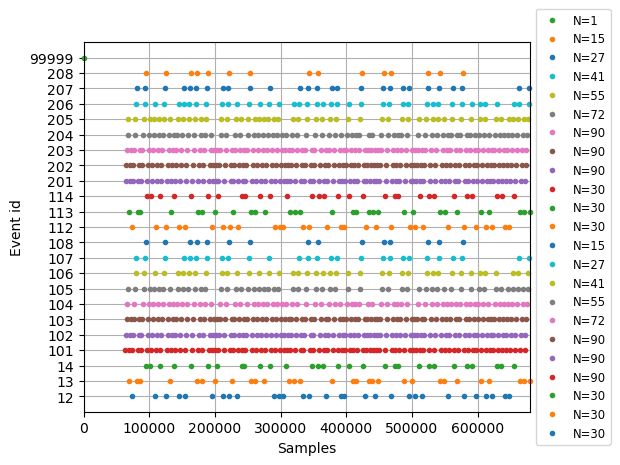

In [233]:
event_id = {'Normal/1': 201,
            'Normal/2': 202,
            'Normal/3': 203,
            'Normal/4': 204,
            'Normal/5': 205,
            'Normal/6': 206,
            'Normal/7': 207,
            'Normal/8': 208,
            'Special/no_audio': 112,
            'Special/no_visual': 114,
            'Special/no_visual_no_audio': 113
}

mne.viz.plot_events(events);

## Create and group epochs

In [234]:
# Set your time window
tmin, tmax = -0.1, 0.5

# Pick channels
picks = mne.pick_types(raw.info, eeg = True, meg = False, eog = False)

reject = {'eeg': 150e-6}

# Create epochs 
epochs = mne.Epochs(raw, events, event_id, tmin, tmax, picks = picks, reject = reject, baseline=(None, 0), preload = True)


Not setting metadata
570 matching events found
Setting baseline interval to [-0.1, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 570 events and 601 original time points ...
0 bad epochs dropped


In [235]:
#Group epochs
epochs_resampled = epochs.resample(250)
#Save epochs in fif file
epochs_resampled.save("epochs-epo.fif")

normal_epochs = epochs_resampled['Normal']
special_epochs = epochs_resampled['Special']
special_audio = epochs_resampled['no_audio']
special_visual = epochs_resampled['no_visual']
special_visual_and_audio = epochs_resampled['no_visual_no_audio']

## Evoked responses

In [248]:
#Create evoked variables
normal_evoked_responses = normal_epochs.average()
special_evoked_responses = special_epochs.average()
special_audio_evoked_responses = special_audio.average()
special_visual_evoked_responses = special_visual.average()
special_visual_and_audio_evoked_responses = special_visual_and_audio.average()

## Plotting tiiiime

combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"


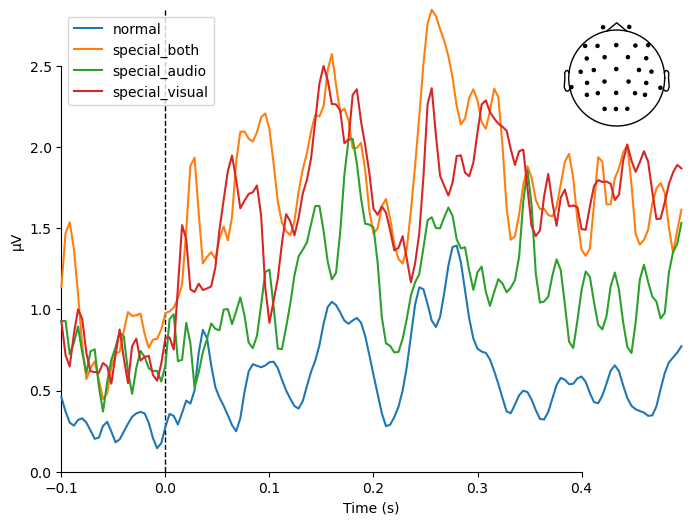

combining channels using "mean"
combining channels using "mean"


/var/folders/wv/k1c_2q2x52q536wp2_p2kdpm0000gn/T/ipykernel_91045/2228403691.py:3: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  mne.viz.plot_compare_evokeds(dict(special_both = special_visual_and_audio_evoked_responses, special_audio = special_audio_evoked_responses) , show_sensors='upper right', picks=["Fz"], combine = "mean")


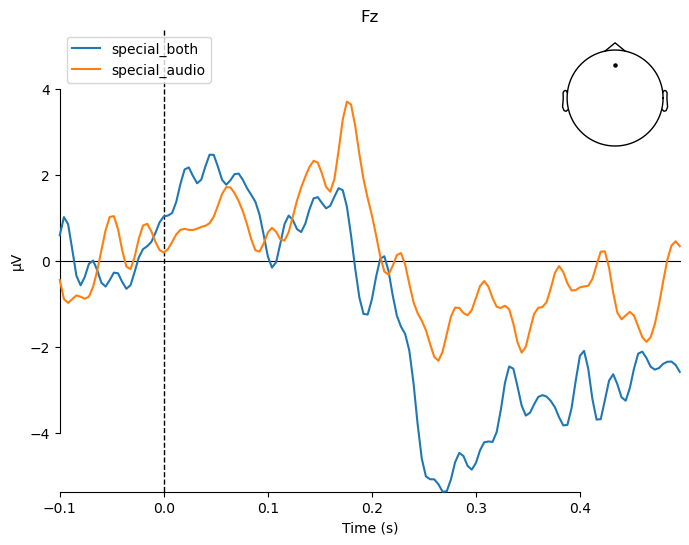

combining channels using "mean"
combining channels using "mean"


/var/folders/wv/k1c_2q2x52q536wp2_p2kdpm0000gn/T/ipykernel_91045/2228403691.py:4: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  mne.viz.plot_compare_evokeds(dict(special_both = special_visual_and_audio_evoked_responses, special_visual = special_visual_evoked_responses) , show_sensors='upper right', picks=["Oz"], combine = "mean")


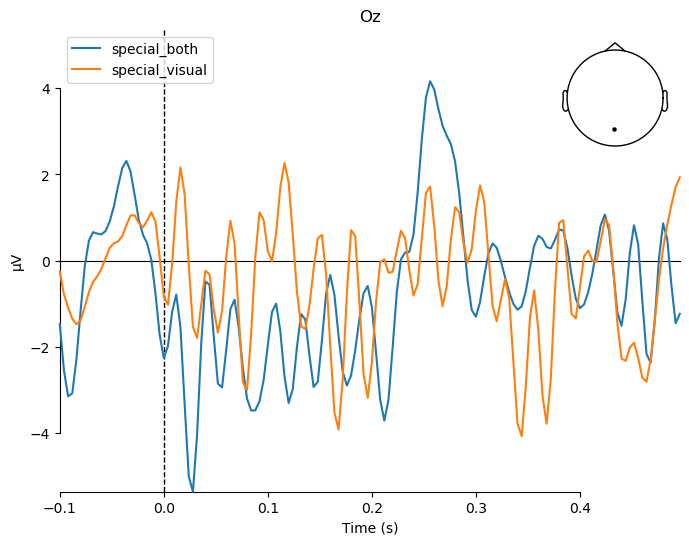

[<Figure size 800x600 with 2 Axes>]

In [251]:
#Comparing groups
mne.viz.plot_compare_evokeds(dict(normal = normal_evoked_responses, special_both = special_visual_and_audio_evoked_responses, special_audio = special_audio_evoked_responses, special_visual = special_visual_evoked_responses) , show_sensors='upper right')
mne.viz.plot_compare_evokeds(dict(special_both = special_visual_and_audio_evoked_responses, special_audio = special_audio_evoked_responses) , show_sensors='upper right', picks=["Fz"], combine = "mean")
mne.viz.plot_compare_evokeds(dict(special_both = special_visual_and_audio_evoked_responses, special_visual = special_visual_evoked_responses) , show_sensors='upper right', picks=["Oz"], combine = "mean")

No projector specified for this dataset. Please consider the method self.add_proj.


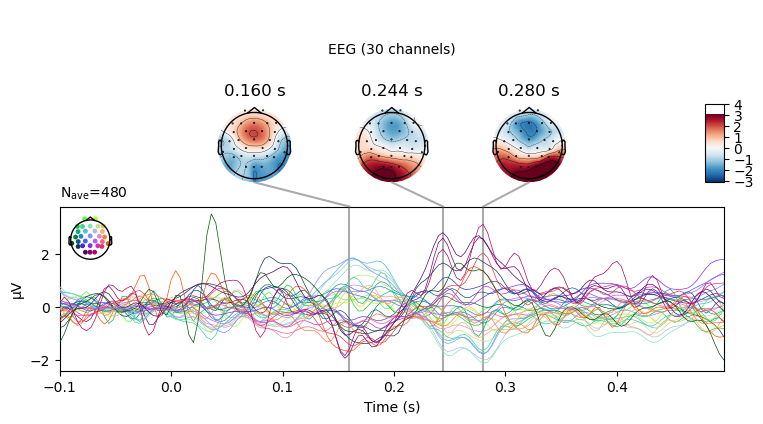

No projector specified for this dataset. Please consider the method self.add_proj.


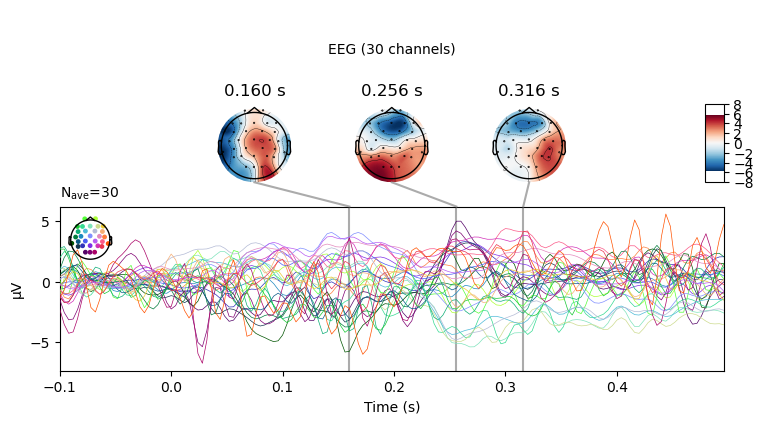

No projector specified for this dataset. Please consider the method self.add_proj.


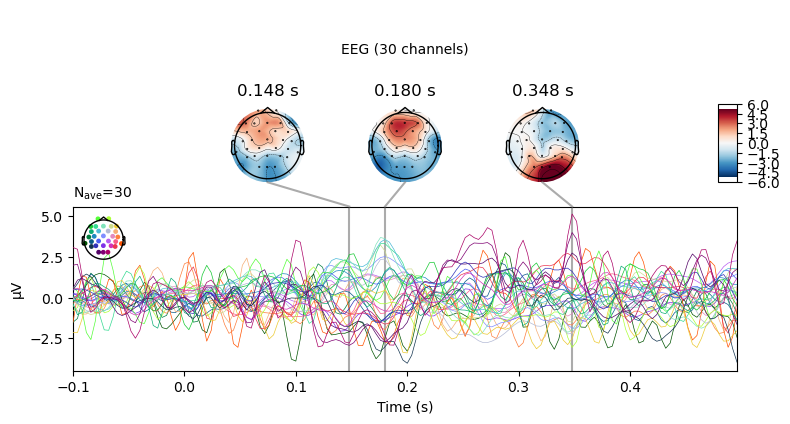

No projector specified for this dataset. Please consider the method self.add_proj.


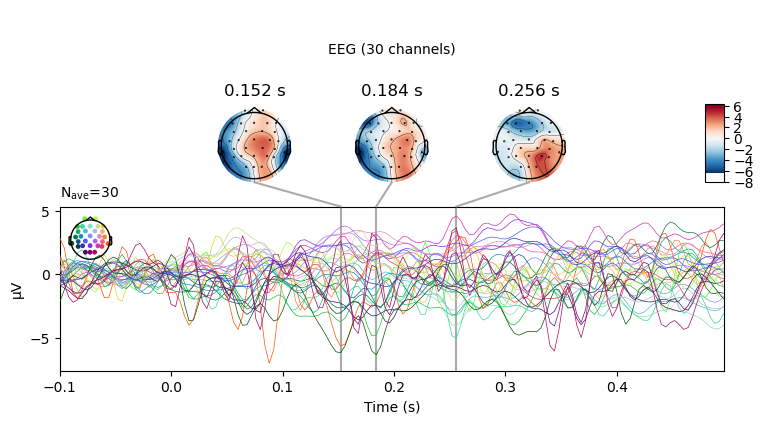

In [240]:
normal_evoked_responses.plot_joint(picks = 'eeg');
special_visual_and_audio_evoked_responses.plot_joint(picks = 'eeg');
special_audio_evoked_responses.plot_joint(picks = 'eeg');
special_visual_evoked_responses.plot_joint(picks = 'eeg');

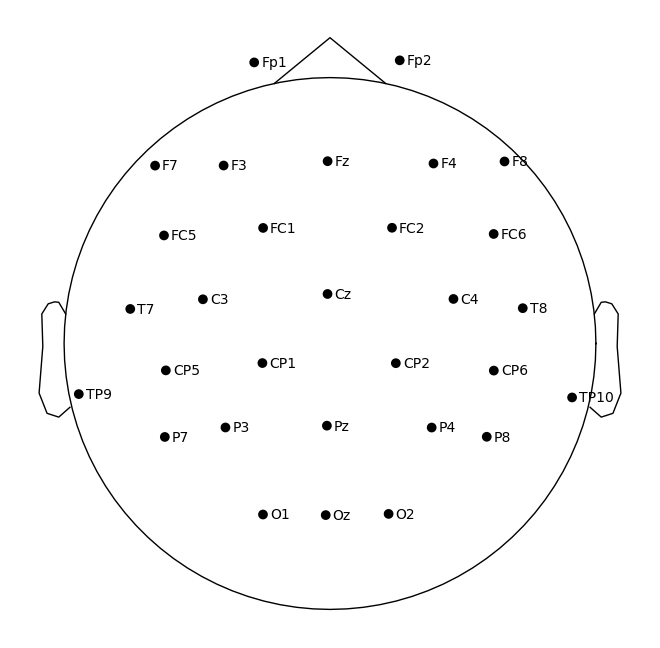

In [241]:
normal_epochs.plot_sensors(ch_type='eeg', show_names=True);

Auditory MMN is usually found around Fz (and also a bit in FC1, FC2 and Cz)
Visual MMN is usually found around O1, Oz and O2

Not setting metadata
480 matching events found
No baseline correction applied
0 projection items activated


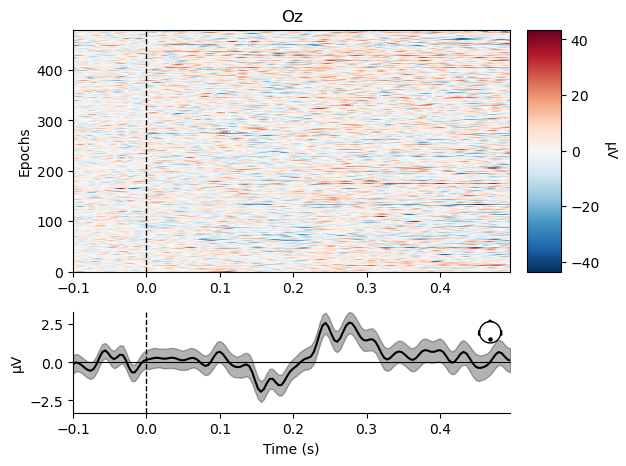

Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated


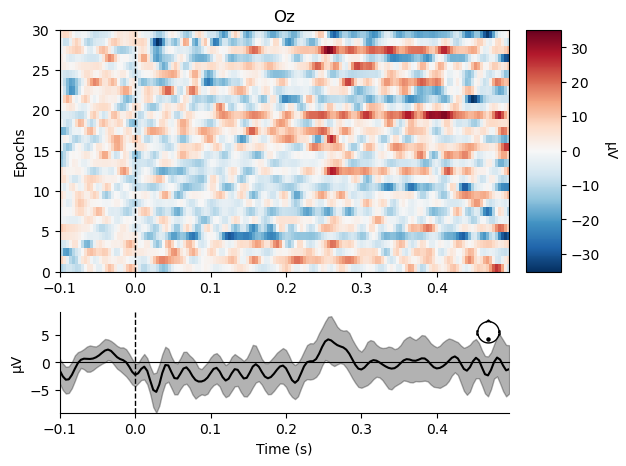

Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated


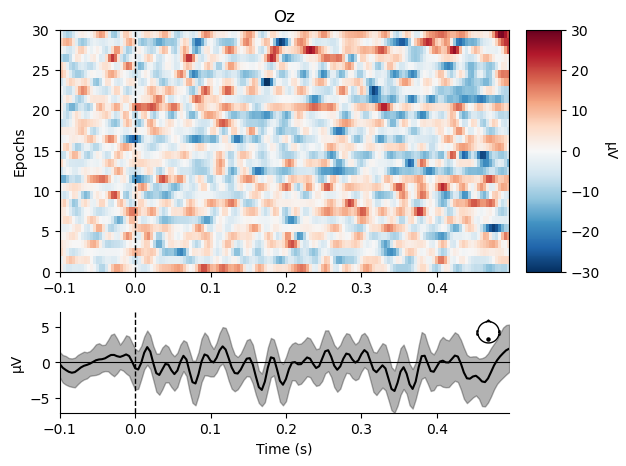

Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated


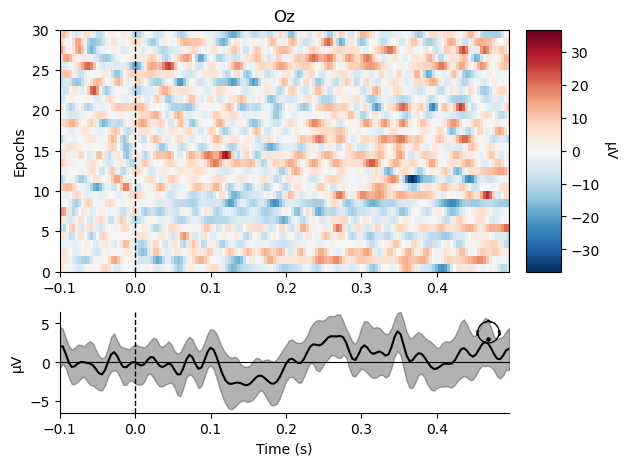

In [242]:
# Oz
normal_epochs.plot_image(picks=['Oz']);
special_visual_and_audio.plot_image(picks=['Oz']);
special_visual.plot_image(picks=['Oz']);
special_audio.plot_image(picks=['Oz']);


Not setting metadata
480 matching events found
No baseline correction applied
0 projection items activated


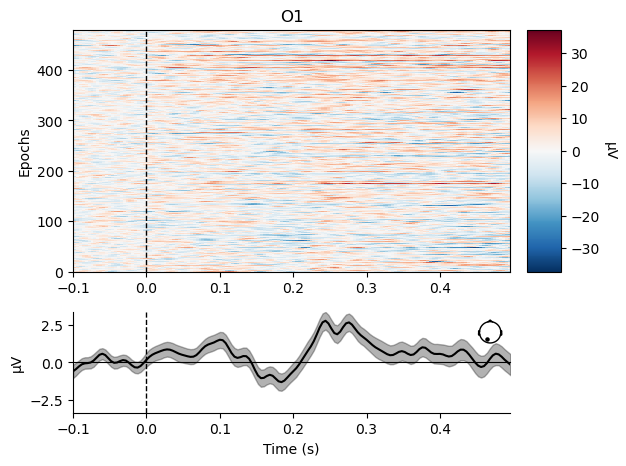

Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated


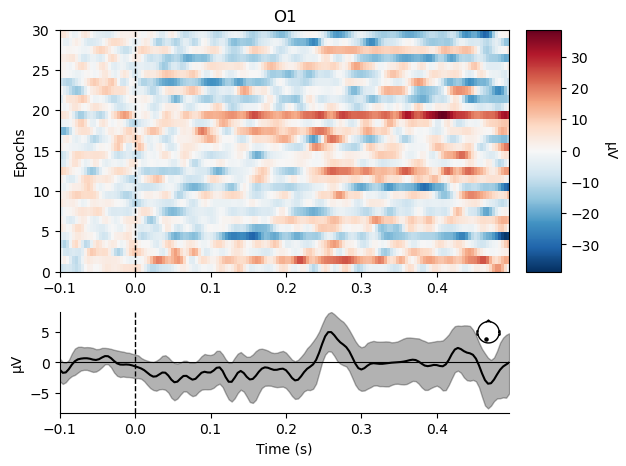

Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated


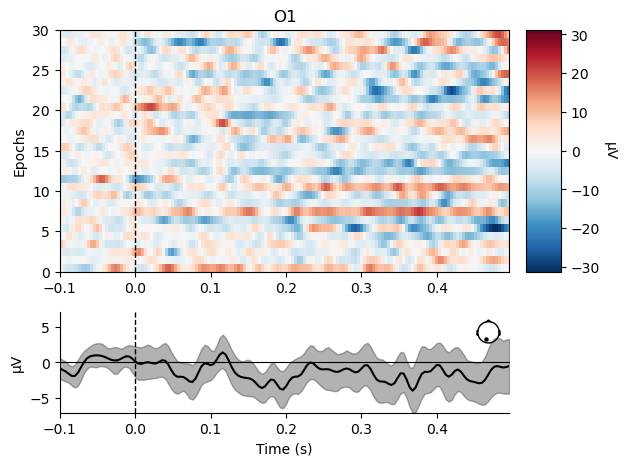

Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated


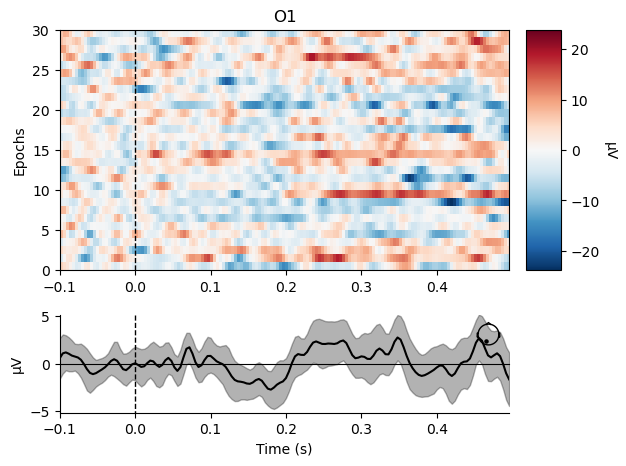

In [243]:
# O1
normal_epochs.plot_image(picks=['O1']);
special_visual_and_audio.plot_image(picks=['O1']);
special_visual.plot_image(picks=['O1']);
special_audio.plot_image(picks=['O1']);

Not setting metadata
480 matching events found
No baseline correction applied
0 projection items activated


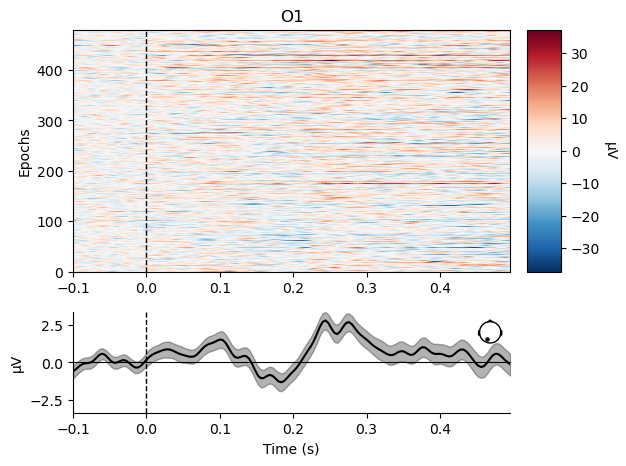

Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated


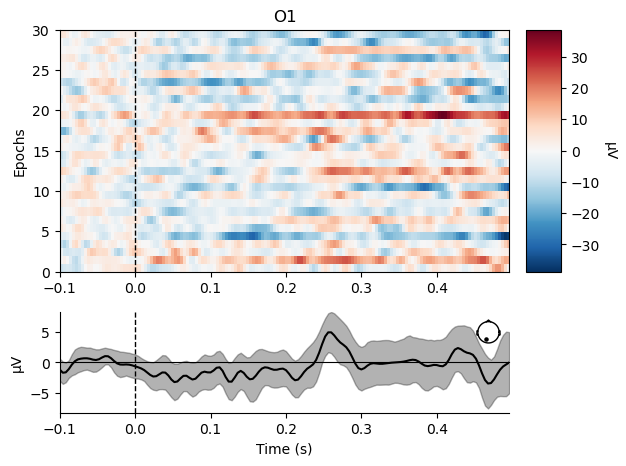

Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated


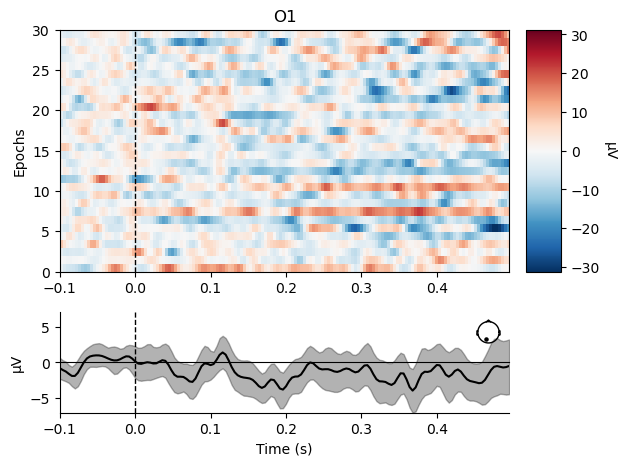

Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated


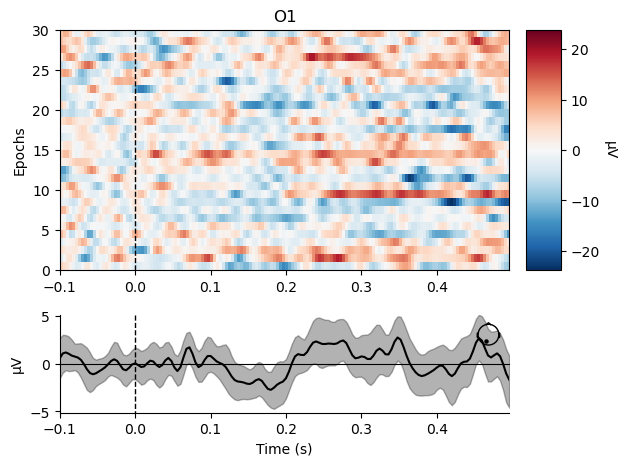

In [244]:
# O2
normal_epochs.plot_image(picks=['O1']);
special_visual_and_audio.plot_image(picks=['O1']);
special_visual.plot_image(picks=['O1']);
special_audio.plot_image(picks=['O1']);

Not setting metadata
480 matching events found
No baseline correction applied
0 projection items activated


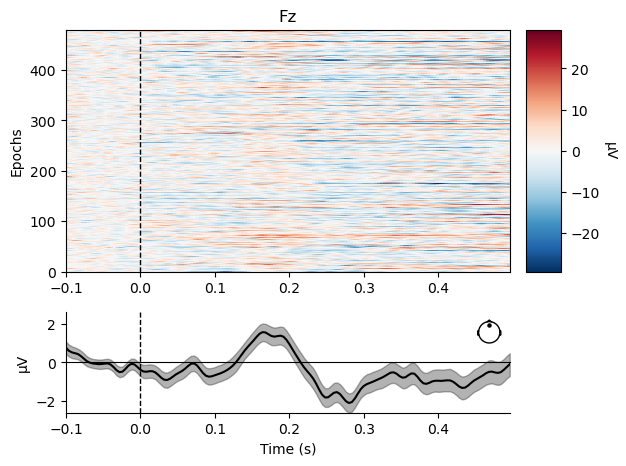

Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated


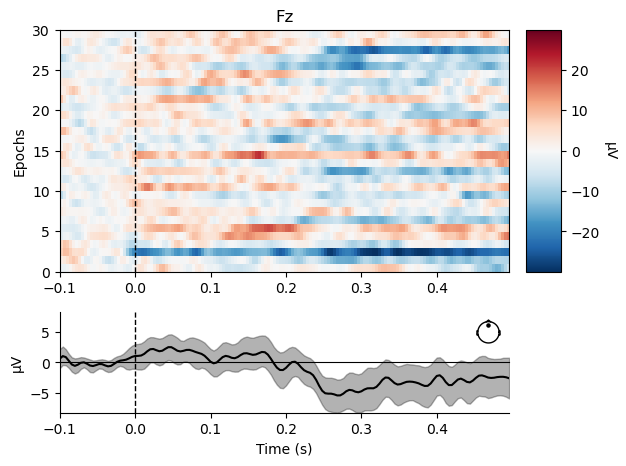

Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated


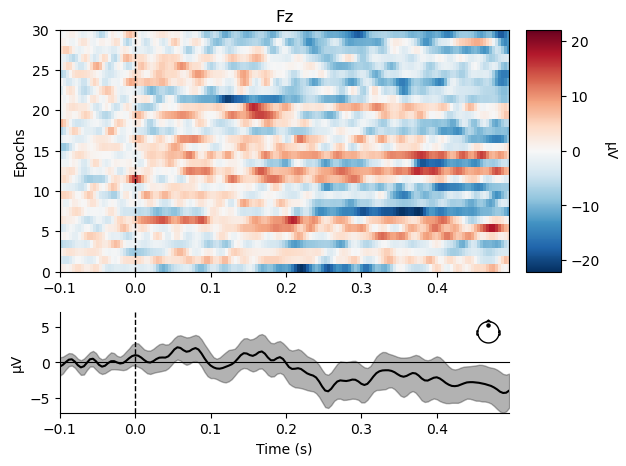

Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated


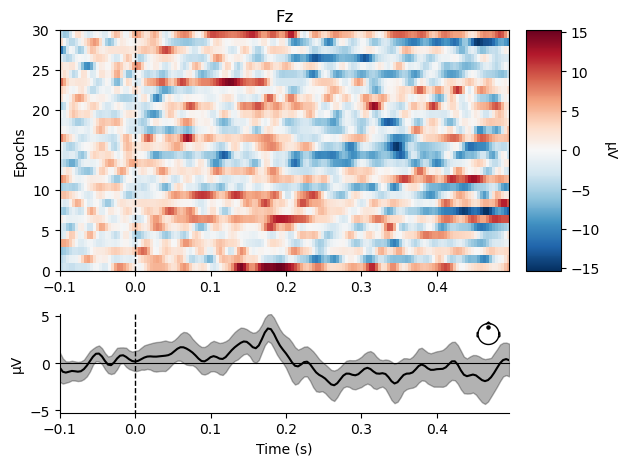

In [245]:
# Fz
normal_epochs.plot_image(picks=['Fz']);
special_visual_and_audio.plot_image(picks=['Fz']);
special_visual.plot_image(picks=['Fz']);
special_audio.plot_image(picks=['Fz']);